In [0]:
from pyspark.sql import SparkSession
import numpy as np

def importcsv(filepath, outdata, getnames=True):
    """
    Read a CSV file using SparkSession and assign the resulting dataframe to a variable.

    Parameters
    ----------
    filepath : str
        The path to the CSV file to be read.
    outdata : str
        The name of the variable to which the dataframe should be assigned.
    getnames : bool, optional
        If True, the first row of the CSV file will be treated as the header and used to name the columns
        of the resulting dataframe. If False, generic column names will be assigned.

    Returns
    -------
    None

    Examples
    --------
    >>> importcsv(filepath='dbfs:/FileStore/shared_uploads/purvajainpj123@gmail.com/store1.csv', outdata='store_data', getnames=True)
    >>> store_data.show()
    +---+-----+-------+
    | id| name|    url|
    +---+-----+-------+
    |  1|Apple|apple.com|
    |  2|Google|google.com|
    +---+-----+-------+
    """
    # Create a SparkSession
    spark = SparkSession.builder.appName("ImportCSV").getOrCreate()

    # Read CSV file using SparkSession
    header = True if getnames else False
    df = spark.read.csv(filepath, header=header)

    # Rename columns if getnames is False
    if not getnames:
        columns = ["_c" + str(i) for i in range(len(df.columns))]
        df = df.toDF(*columns)

    # Assign the dataframe to the output variable
    globals()[outdata] = df
    
# Call the function with the desired arguments
importcsv(filepath='dbfs:/FileStore/shared_uploads/purvajainpj123@gmail.com/store1.csv', outdata='store_data', getnames=True)
store_data.show()



+------+-----------+------+----------+-----------+-----------------+-----------+
|Region|Advertising|Gender|Book_Sales|Music_Sales|Electronics_Sales|Total_Sales|
+------+-----------+------+----------+-----------+-----------------+-----------+
|  West|          1|  Male|       260|         85|              410|        755|
|  West|          0|  Male|       320|         85|              450|        855|
|  West|          1|Female|       280|         65|              540|        885|
| South|          1|Female|       300|         60|              250|        610|
|  West|          1|Female|       270|         80|              450|        800|
|  West|          0|Female|       290|         55|              410|        755|
|  West|          1|  Male|       320|         60|              560|        940|
| North|          1|Female|       240|         75|              360|        675|
| North|          0|  Male|       350|         90|              460|        900|
| North|          1|Female| 

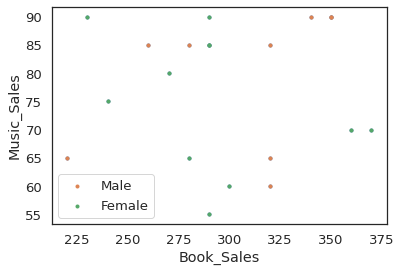

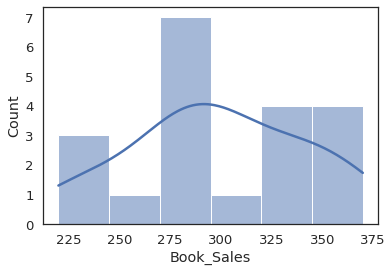

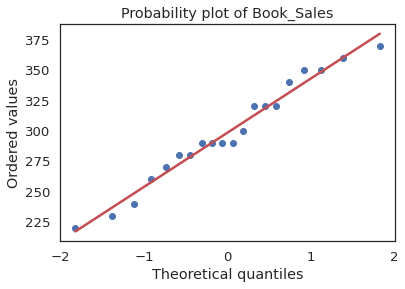

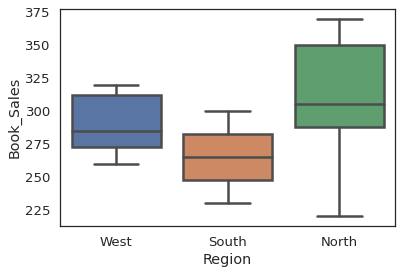

,Advertising,Book_Sales,Music_Sales,Electronics_Sales,Total_Sales
Advertising,1.00,-0.02,0.25,0.12,0.11
Book_Sales,-0.02,1.00,0.03,0.35,0.67
Music_Sales,0.25,0.03,1.00,-0.01,0.11
Electronics_Sales,0.12,0.35,-0.01,1.00,0.92
Total_Sales,0.11,0.67,0.11,0.92,1.00


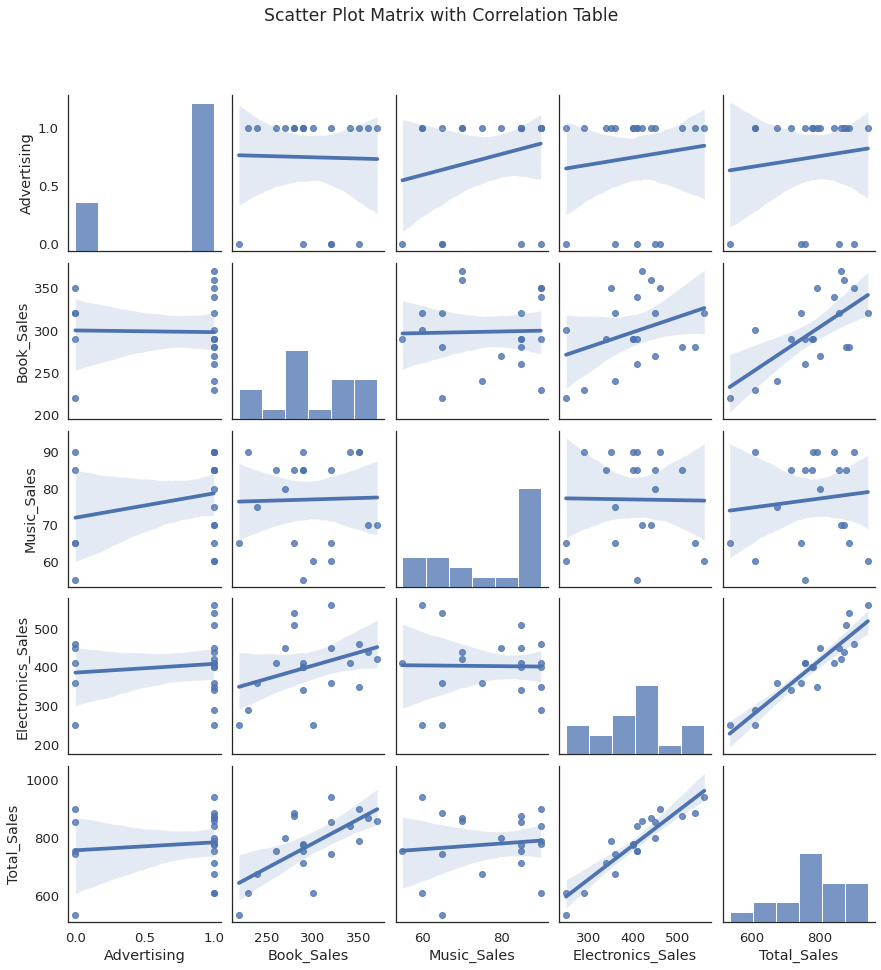

Coefficients: [-7.326915425010316,1.177800153368966,1.1827168118772124]
Intercept: 216.66969957283075
RMSE: 38.97994064816529
r2: 0.8617469326963


In [0]:
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.stat import Correlation
from pyspark.ml.stat import Summarizer
from pyspark.ml.linalg import Vectors
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pyspark.mllib.stat import Statistics
from IPython.display import HTML


class DataVisualizer:
    """
    A class to visualize and analyze data using Spark and Python.

    Parameters:
    -----------
    data : pyspark.sql.DataFrame
        The input data.

    Attributes:
    -----------
    data : pyspark.sql.DataFrame
        The input data.

    Methods:
    --------
    create_scatterplot(xvar, yvar, groupvar=None, plottype="sgplot"):
        Creates a scatter plot of xvar versus yvar.
        
    create_histogram(var):
        Creates a histogram of var.
        
    create_probplot(var):
        Creates a probability plot of var.
        
    create_boxplot(xvar, yvar):
        Creates a box plot of yvar grouped by xvar.
        
    create_correlation_matrix():
        Creates a scatter plot matrix with a correlation table.
        
    create_linear_regression(depvar, indvars):
        Creates a linear regression model of depvar on indvars.

    """

    

    def __init__(self, data):
        """Initializes a DataAnalysis object with the given data.

        Parameters
        ----------
        data : pyspark.sql.DataFrame
            The data to be analyzed in a PySpark DataFrame.

        Returns
        -------
        None
        """
        self.data = data


    def create_scatterplot(self, xvar, yvar, groupvar=None, plottype="sgplot"):
        """
        Creates a scatter plot of xvar versus yvar.

        Parameters:
        -----------
        xvar : str
            The name of the x variable.
            
        yvar : str
            The name of the y variable.
            
        groupvar : str, optional
            The name of the grouping variable.
            Default is None.
            
        plottype : str, optional
            The type of plot to use.
            "sgplot" for scatter plot (default),
            "gplot" for line plot.
            
        Returns:
        --------
        None.
        """
        # Convert the DataFrame to a Pandas DataFrame
        pdf = self.data.toPandas()

        # Set default plot type
        if plottype == "gplot":
            plt.plot(pdf[xvar], pdf[yvar], "o")
        else:
            plt.scatter(pdf[xvar], pdf[yvar], marker=".")

        # Add group variable if specified
        if groupvar:
            groups = pdf[groupvar].unique()
            for i, group in enumerate(groups):
                group_data = pdf[pdf[groupvar] == group]
                if plottype == "gplot":
                    plt.plot(group_data[xvar], group_data[yvar], "o", label=group)
                else:
                    plt.scatter(group_data[xvar], group_data[yvar], marker=".", label=group)

        # Add axis labels and legend
        plt.xlabel(xvar)
        plt.ylabel(yvar)
        if groupvar:
            plt.legend()
        plt.show()

    def create_histogram(self, var):
        """
        Creates a histogram of var.

        Parameters:
        -----------
        var : str
            The name of the variable to plot.
            
        Returns:
        --------
        None.
        """
        plt.figure()
        sns.histplot(data=self.data.toPandas(), x=var, kde=True)
        plt.show()

    def create_probplot(self, var):
        """
        Function to create a probability plot.

        Parameters:
        -----------
        var : str
            The name of the column to be plotted.
        """
        plt.figure()
        res = stats.probplot(self.data.select(var).dropna().rdd.flatMap(lambda x: x).collect(), plot=plt)
        plt.title(f"Probability plot of {var}")
        plt.xlabel("Theoretical quantiles")
        plt.ylabel("Ordered values")
        plt.show()
        
    def create_boxplot(self, xvar, yvar):
        """
        Function to create a box plot.

        Parameters:
        -----------
        xvar : str
            The name of the column to be plotted on the x-axis.
        yvar : str
            The name of the column to be plotted on the y-axis.
        """
        plt.figure()
        sns.boxplot(data=self.data.toPandas(), x=xvar, y=yvar)
        plt.show()
        
    def create_boxplot(self, xvar, yvar):
        """
        Function to create a box plot.

        Parameters:
        -----------
        xvar : str
            The name of the column to be plotted on the x-axis.
        yvar : str
            The name of the column to be plotted on the y-axis.
        """
        plt.figure()
        sns.boxplot(data=self.data.toPandas(), x=xvar, y=yvar)
        plt.show()
        
    def create_correlation_matrix(self):
        """Create a scatter plot matrix and display the correlation table of the data.

        This function uses the Seaborn library to create a scatter plot matrix of the data,
        and displays the corresponding correlation table. The correlation table is styled
        with a background gradient using the 'coolwarm' color map, and precision is set to 2
        decimal places.

        Parameters:
        -----------
        self : SparkDataFrame
            The SparkDataFrame object containing the data to be plotted and analyzed.

        Returns:
        --------
        None
            This function does not return anything, but displays the scatter plot matrix
            and correlation table in the output.

        Example:
        --------
        >>> data = SparkDataFrame(...)
        >>> analysis = DataAnalysis(data)
        >>> analysis.create_correlation_matrix()
        """
        sns.set(style="white")
        sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

        # Create scatter plot matrix
        plot = sns.pairplot(self.data.toPandas(), diag_kind='hist', kind='reg')
        plot.fig.suptitle('Scatter Plot Matrix with Correlation Table', y=1.08)

        # Add correlation table
        corr = self.data.toPandas().corr()
        corr_text = corr.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1, axis=None).format(precision=2)
        text = corr_text.set_table_attributes('style="font-size: 10px"').set_caption('Correlation Table')

        # Display the graph with the correlation table
        html_text = text.render()
        display(HTML(html_text))
        plt.show()
        
    
    def create_linear_regression(self, depvar, indvars):
        """
        Fits a linear regression model to the data with the specified dependent variable and independent variables.

        Parameters:
        -----------
        depvar: str
            The name of the dependent variable.

        indvars: list
            A list of names of the independent variables.

        Returns:
        --------
        None
            Prints the model coefficients, intercept, root mean squared error, and r-squared.

        """

        # assemble feature vector
        assembler = VectorAssembler(inputCols=indvars, outputCol="features")
        assembled_df = assembler.transform(self.data)

        # create linear regression model
        lr = LinearRegression(labelCol=depvar, featuresCol="features")

        # fit the model
        model = lr.fit(assembled_df)

        # print the summary
        print("Coefficients: {}".format(model.coefficients))
        print("Intercept: {}".format(model.intercept))

        # print the summary statistics
        training_summary = model.summary
        print("RMSE: {}".format(training_summary.rootMeanSquaredError))
        print("r2: {}".format(training_summary.r2))


# create an instance of the DataVisualizer class
dv = DataVisualizer(df)

# use the scatterplot method to create a scatter plot
dv.create_scatterplot(xvar="Book_Sales", yvar="Music_Sales", groupvar="Gender", plottype="sgplot")

# use the histogram method to create a histogram
dv.create_histogram(var="Book_Sales")

# use the probplot method to create a probability plot
dv.create_probplot(var='Book_Sales')

# use the boxplot method to create a box plot
dv.create_boxplot("Region", "Book_Sales")  

# use the probplot method to create a probability plot
dv.create_correlation_matrix()

# use the linear regression method to create a Linear Regression by statistics
dv.create_linear_regression(depvar='Total_Sales', indvars=['Advertising', 'Music_Sales', 'Electronics_Sales'])

In [0]:
help(DataVisualizer)

Help on class DataVisualizer in module __main__:

class DataVisualizer(builtins.object)
 |  DataVisualizer(data)
 |  
 |  A class to visualize and analyze data using Spark and Python.
 |  
 |  Parameters:
 |  -----------
 |  data : pyspark.sql.DataFrame
 |      The input data.
 |  
 |  Attributes:
 |  -----------
 |  data : pyspark.sql.DataFrame
 |      The input data.
 |  
 |  Methods:
 |  --------
 |  create_scatterplot(xvar, yvar, groupvar=None, plottype="sgplot"):
 |      Creates a scatter plot of xvar versus yvar.
 |      
 |  create_histogram(var):
 |      Creates a histogram of var.
 |      
 |  create_probplot(var):
 |      Creates a probability plot of var.
 |      
 |  create_boxplot(xvar, yvar):
 |      Creates a box plot of yvar grouped by xvar.
 |      
 |  create_correlation_matrix():
 |      Creates a scatter plot matrix with a correlation table.
 |      
 |  create_linear_regression(depvar, indvars):
 |      Creates a linear regression model of depvar on indvars.
 |  
 